In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns               #pip install seaborn
sns.set_style('whitegrid')

In [2]:
pd.set_option('display.max_row', 2)

In [3]:
# room occupancy training data

df = pd.read_csv('/Users/maryhennessy/desktop/datatraining.csv')

Occupancy
0    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

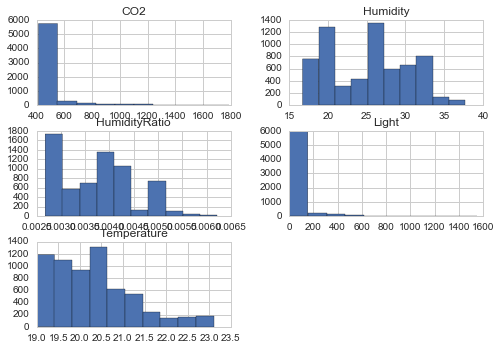

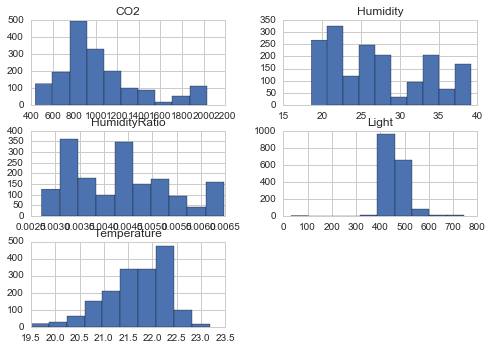

In [4]:
df.groupby('Occupancy').hist()

Occupancy
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Light, dtype: object

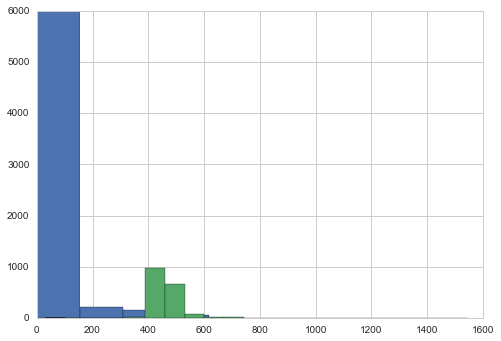

In [5]:
df.groupby('Occupancy').Light.hist(alpha=0.4)

In [6]:
df.head(50)

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,04/02/2015 17:51,23.18,27.272,426.0,721.25,0.004793,1
...,...,...,...,...,...,...,...
49,04/02/2015 18:40,22.39,27.340,0.0,630.50,0.004579,0


In [7]:
df.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.00,8143.0000,8143.000000,8143.0,8143.000000,8143.0
...,...,...,...,...,...,...
max,23.18,39.1175,1546.333333,2028.5,0.006476,1.0


In [8]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Date         0
            ..
Occupancy    0
dtype: int64

In [9]:
df.Temperature.value_counts()



19.39    532
        ... 
21.31      1
Name: Temperature, dtype: int64

In [10]:
df.Temperature.count()

8143

In [11]:
df.info() # confirm no nulls here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
Date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [12]:
df.dtypes

Date         object
              ...  
Occupancy     int64
dtype: object

In [13]:
df.tail(5)

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8138,10/02/2015 09:29,21.05,36.0975,433.0,787.25,0.005579,1
...,...,...,...,...,...,...,...
8142,10/02/2015 09:33,21.10,36.2000,447.0,821.00,0.005612,1


In [14]:
df[99:103]

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
99,04/02/2015 19:30,22.1,27.2,0.0,568.0,0.004475,0
...,...,...,...,...,...,...,...
102,04/02/2015 19:33,22.1,27.2,0.0,563.0,0.004475,0


In [15]:
df['Date'].head(5)

0    04/02/2015 17:51
           ...       
4    04/02/2015 17:55
Name: Date, dtype: object

In [16]:
df['Date'].tail(3)

8140    10/02/2015 09:30
              ...       
8142    10/02/2015 09:33
Name: Date, dtype: object

In [17]:
print (df[(df.Occupancy == 1)&(df.Temperature > 23)&(df.Humidity > 17)]) #AND

                Date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0   04/02/2015 17:51        23.18    27.272  426.0  721.25       0.004793   
..               ...          ...       ...    ...     ...            ...   
13  04/02/2015 18:04        23.05    27.150  419.0  687.50       0.004734   

    Occupancy  
0           1  
..        ...  
13          1  

[14 rows x 7 columns]


In [18]:
print (df.iloc[99]) #row by position

Date         04/02/2015 19:30
                   ...       
Occupancy                   0
Name: 99, dtype: object


In [19]:
print (df.iloc[[99,1099,2099,3099]])

                  Date  Temperature  Humidity  Light    CO2  HumidityRatio  \
99    04/02/2015 19:30         22.1      27.2    0.0  568.0       0.004475   
...                ...          ...       ...    ...    ...            ...   
3099  06/02/2015 21:29         20.2      19.0    0.0  446.0       0.002774   

      Occupancy  
99            0  
...         ...  
3099          0  

[4 rows x 7 columns]


In [20]:
print (df.loc[99]) #row by label

Date         04/02/2015 19:30
                   ...       
Occupancy                   0
Name: 99, dtype: object


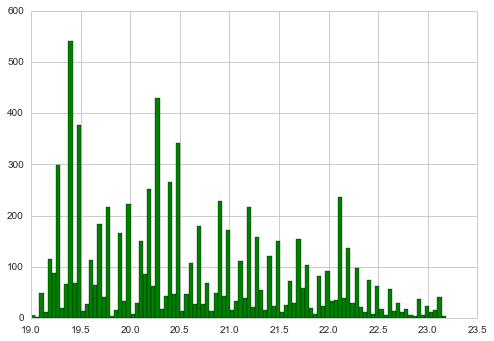

In [21]:
df['Temperature'].hist(bins=100, color='green')

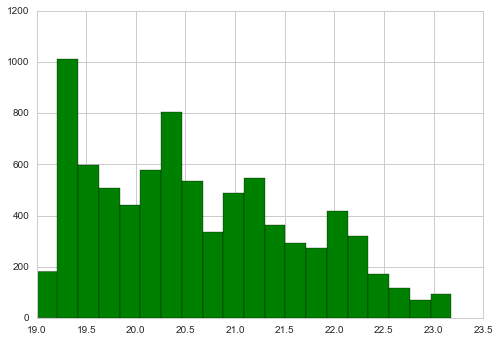

In [22]:
df['Temperature'].hist(bins=20, color='green')

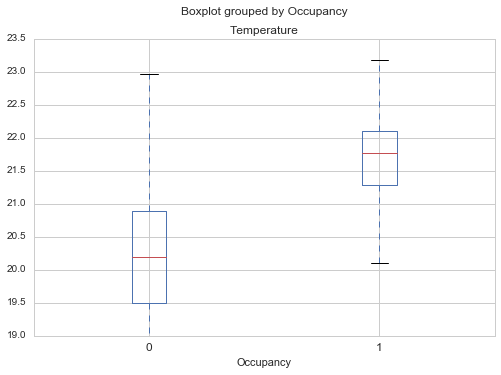

In [23]:
df.boxplot(column= 'Temperature', by = 'Occupancy') #temp interesting

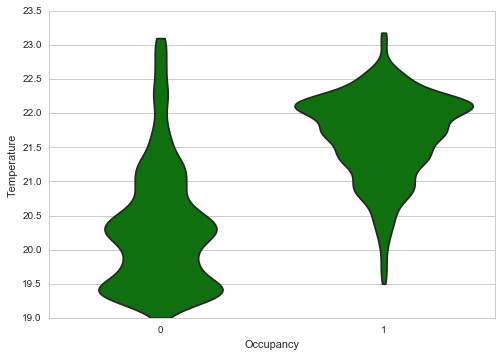

In [24]:
sns.violinplot(data = df, x='Occupancy', y='Temperature', inner=None, color="green", cut=0) #look inside

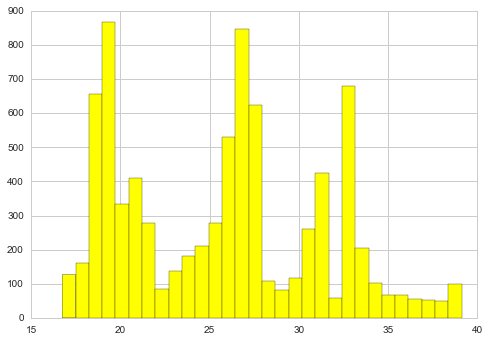

In [25]:
df['Humidity'].hist(bins=30, color='yellow')

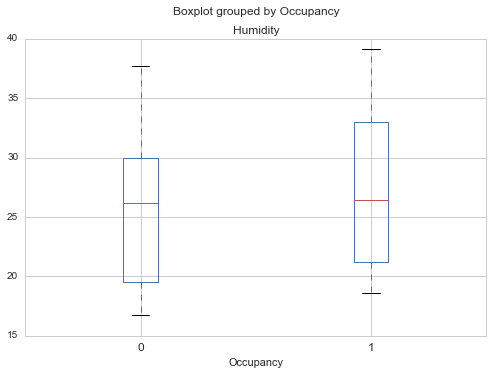

In [26]:
df.boxplot(column= 'Humidity', by = 'Occupancy') # investigate more

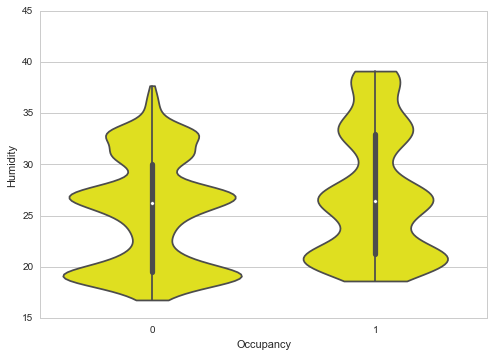

In [27]:
sns.violinplot(data = df, x='Occupancy', y='Humidity',  color="yellow", cut=0) #better but humidity might be left out for testing

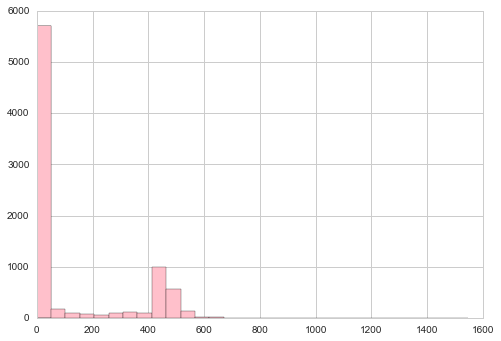

In [28]:
df['Light'].hist(bins=30, color='pink')

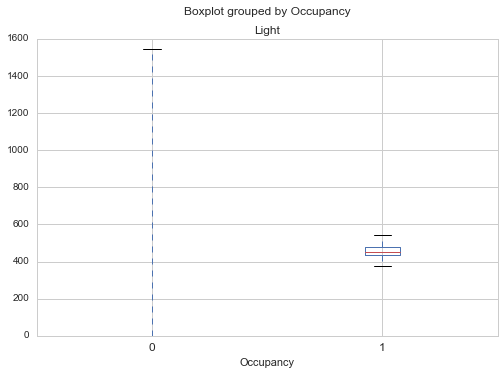

In [29]:
df.boxplot(column= 'Light', by = 'Occupancy')

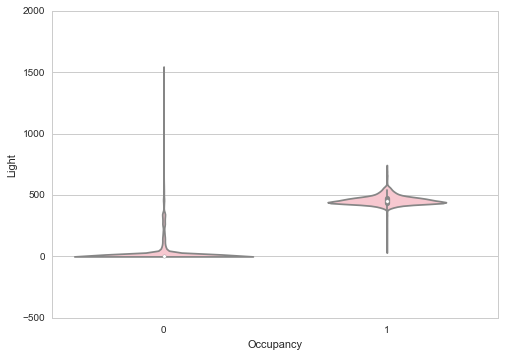

In [30]:
sns.violinplot(data = df, x='Occupancy', y='Light', color="pink", cut=0) # a lot more information here 

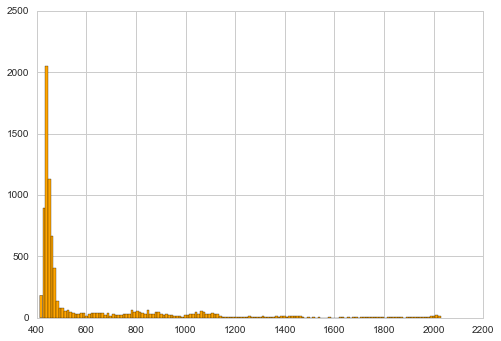

In [31]:
df['CO2'].hist(bins=150, color='orange')

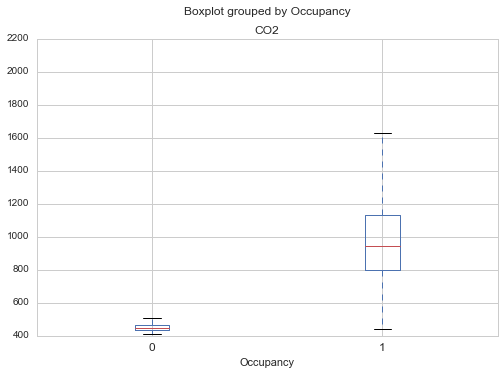

In [32]:
df.boxplot(column= 'CO2', by = 'Occupancy')

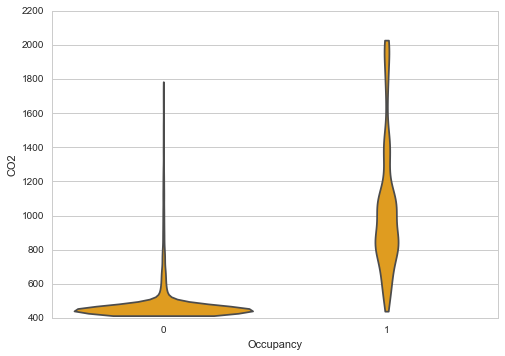

In [33]:
sns.violinplot(data = df, x='Occupancy', y='CO2', inner=None, color="orange", cut=0) 

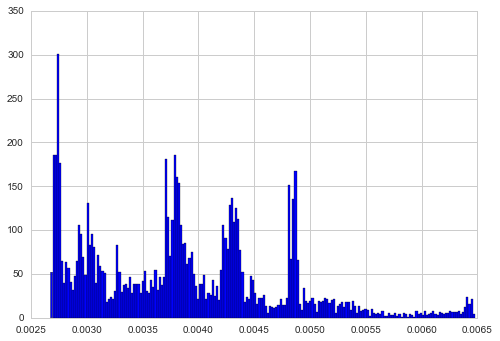

In [34]:
df['HumidityRatio'].hist(bins=200, color='blue')

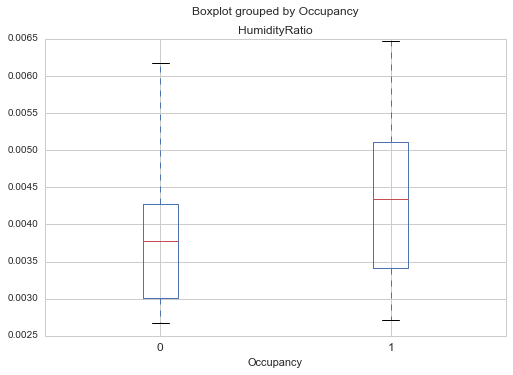

In [35]:
df.boxplot(column= 'HumidityRatio', by = 'Occupancy')

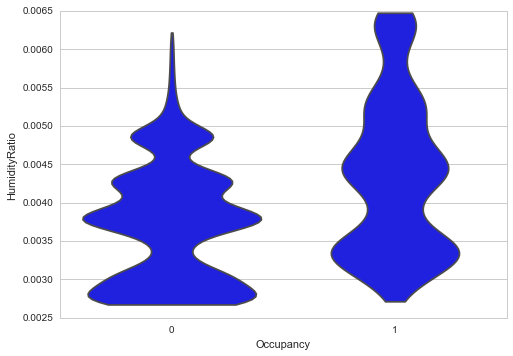

In [36]:
sns.violinplot(data = df, x='Occupancy', y='HumidityRatio', inner=None, color="blue", cut=0)# more alike here

In [37]:
# what to scatter plot...

#df = pd.DataFrame(np.random.rand(10000, 5), columns=['Occupancy','Temperature', 'Light', 'CO2', 'Humidity', 'HumidityRatio'])

#ax = df.plot.scatter(x='Light', y='Occupancy',s=df['CO2']*100, label='Occupancy/CO2');


#df.plot.scatter(x='Light', y='HumidityRatio', color='Green', label='Light/HumidityRatio', ax=ax);

In [38]:
#full_or_empty = (df.groupby('Occupancy'))

#print full_or_empty.sum()
 

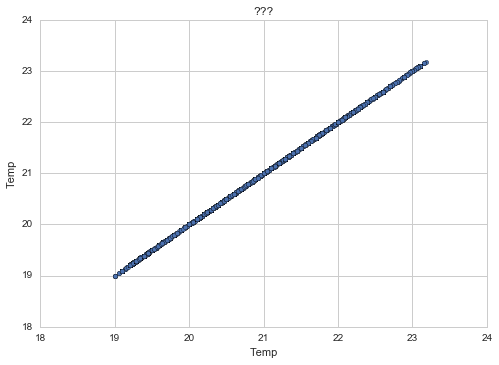

In [39]:
scatterpl = df.plot.scatter(x='Temperature',y='Temperature')
scatterpl.set(title='???',xlabel='Temp',ylabel='Temp')

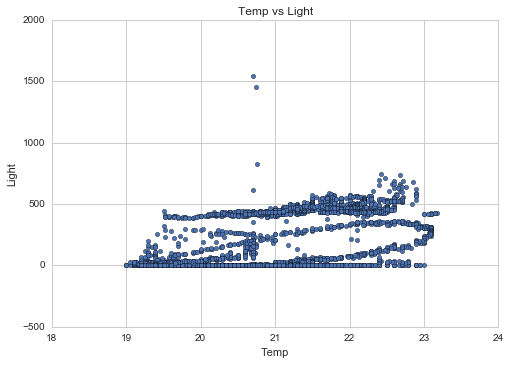

In [40]:
scatterpl = df.plot.scatter(x='Temperature',y='Light')
scatterpl.set(title='Temp vs Light', xlabel='Temp', ylabel='Light')

In [41]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8133,8134,8135,8136,8137,8138,8139,8140,8141,8142
Date,04/02/2015 17:51,04/02/2015 17:51,04/02/2015 17:53,04/02/2015 17:54,04/02/2015 17:55,04/02/2015 17:55,04/02/2015 17:57,04/02/2015 17:57,04/02/2015 17:58,04/02/2015 18:00,...,10/02/2015 09:23,10/02/2015 09:24,10/02/2015 09:26,10/02/2015 09:27,10/02/2015 09:28,10/02/2015 09:29,10/02/2015 09:29,10/02/2015 09:30,10/02/2015 09:32,10/02/2015 09:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Occupancy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [42]:
df2 = df.set_index(['Date'])

In [43]:
df2.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Date,,,,,,
04/02/2015 17:51,23.180,27.272,426.0,721.25,0.004793,1
...,...,...,...,...,...,...
04/02/2015 18:00,23.075,27.175,419.0,688.00,0.004745,1


In [44]:

df3 = df.set_index(['Occupancy'])

In [45]:
df3[:2]

,Date,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,,
1,04/02/2015 17:51,23.18,27.2720,426.0,721.25,0.004793
1,04/02/2015 17:51,23.15,27.2675,429.5,714.00,0.004783


In [46]:
df.cumsum()


,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,04/02/2015 17:51,23.18,27.272,426,721.25,0.004793,1
...,...,...,...,...,...,...,...
8142,04/02/2015 17:5104/02/2015 17:5104/02/2015 17:...,167901,209532,973246,4.93911e+06,31.4524,1729


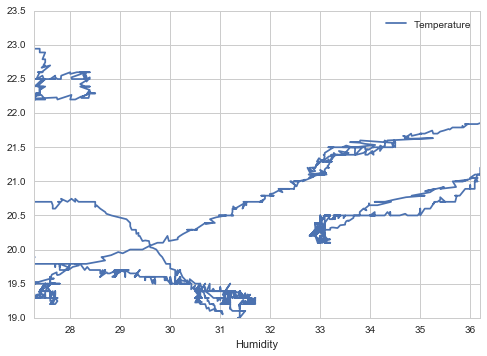

In [47]:
pl_line = df.plot(x='Humidity',y='Temperature')

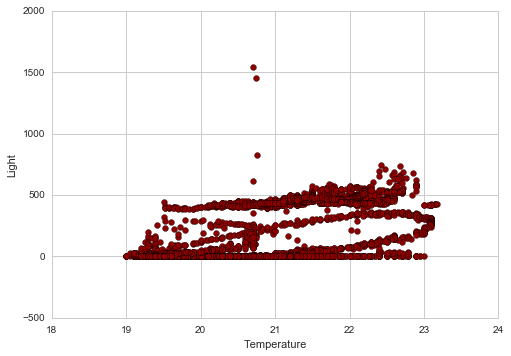

In [48]:
pl_scatter = df.plot.scatter(x='Temperature',y='Light', color = 'DarkRed', s=35)

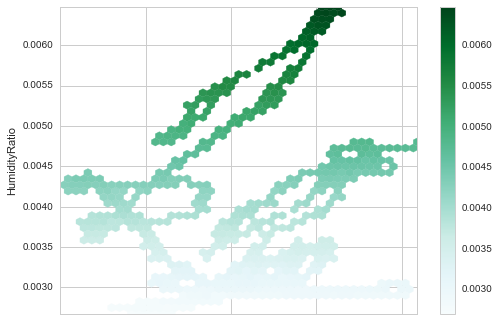

In [49]:

pl_hex = df.plot.hexbin(x='Temperature',y='HumidityRatio',gridsize=45, C='HumidityRatio', reduce_C_function=np.max)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d336290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13e7b3e10>]], dtype=object)

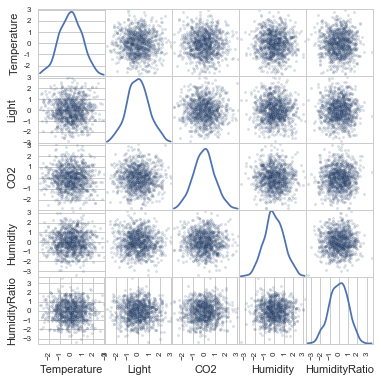

In [50]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 5), columns=['Temperature', 'Light', 'CO2', 'Humidity', 'HumidityRatio'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [51]:

df.mean(skipna=False)

Temperature     -0.018550
                   ...   
HumidityRatio   -0.017438
dtype: float64

In [52]:
df.Temperature.mean()

-0.01854969007866141

In [53]:
print df['Temperature'].mean()

-0.0185496900787


In [54]:
df.Light.mean()

0.010213815968314154

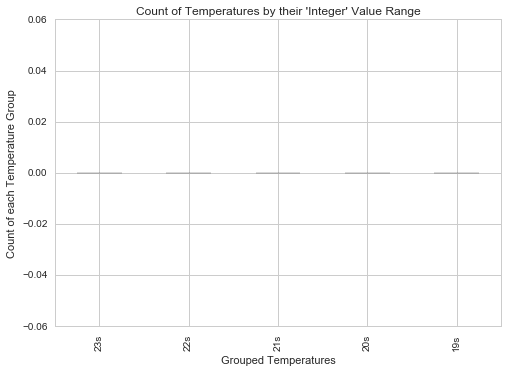

In [55]:
#binning Temperature for graph from http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html

bins=[19,20,21,22,23,24] # bin edges - unnecessary 
heat_groups = ['19s','20s','21s','22s','23s'] # bin labels
TemperatureRanges = pd.cut(df.Temperature,bins,labels = heat_groups) 
df['TemperatureRanges'] = pd.cut(df.Temperature,bins,right =True,labels = heat_groups, include_lowest =True)
#df.groupby(['TemperatureRanges' ]).agg(['mean', 'count'])
pl_bar = pd.value_counts(df['TemperatureRanges']).plot(kind ='bar', color = 'Orange')
pl_bar.set(title= "Count of Temperatures by their 'Integer' Value Range", xlabel='Grouped Temperatures', ylabel='Count of each Temperature Group')


In [56]:
df.TemperatureRanges.count() # I know from prep work no Nulls so something wrong here - fixed!!

0

In [57]:
df.groupby('TemperatureRanges').count()

,Temperature,Light,CO2,Humidity,HumidityRatio
TemperatureRanges,,,,,
19s,0,0,0,0,0
...,...,...,...,...,...
23s,0,0,0,0,0
